#  Stock Dataset – Data Cleaning & EDA

# 1. Show data

In [2]:
import pandas as pd
df = pd.read_csv(r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\2) Stock Prices Data Set.csv")
df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


# 2. Stock Dataset EDA

In [3]:
# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 2. Load the Dataset
file_path = r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\2) Stock Prices Data Set.csv"
df = pd.read_csv(file_path)

# 3. Identify and Handle Missing Values
print("🔹 Missing Values Before:")
print(df.isnull().sum())

# Fill numeric columns with mean
num_cols = ['open', 'high', 'low', 'close', 'volume']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical column 'symbol' with mode
df['symbol'] = df['symbol'].fillna(df['symbol'].mode()[0])

print("\n🔹 Missing Values After:")
print(df.isnull().sum())

# 4. Remove Duplicate Rows
df.drop_duplicates(inplace=True)

# 5. Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# 6. Info and Statistics
print("\n🔹 Data Info:")
df.info()

print("\n🔹 Summary Statistics:")
print(df.describe())

print("\n🔹 Median:")
print(df.median(numeric_only=True))

print("\n🔹 Mode:")
print(df.mode(numeric_only=True).iloc[0])

print("\n🔹 Standard Deviation:")
print(df.std(numeric_only=True))

🔹 Missing Values Before:
symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

🔹 Missing Values After:
symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497472 non-null  float64       
 3   high    497472 non-null  float64       
 4   low     497472 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB

🔹 Summary Statistics:
                                date           open           high  \
count                         497472  497472.

# 3.Stock Price Time Series Analysis

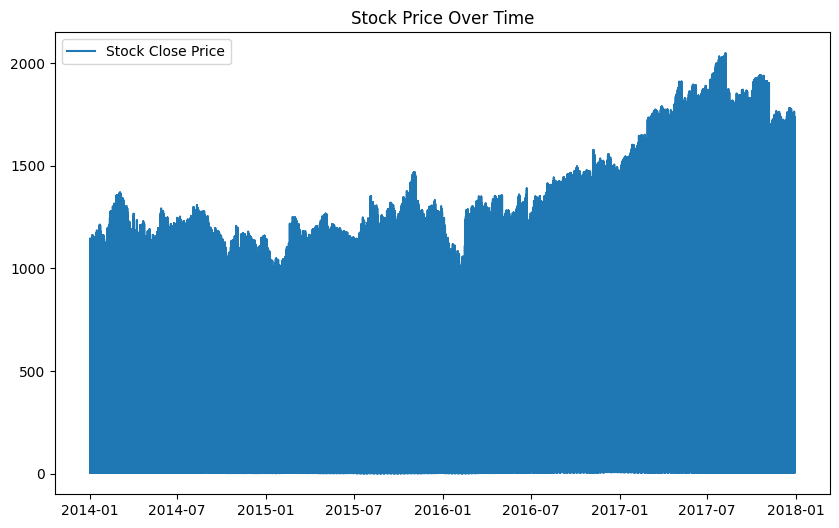

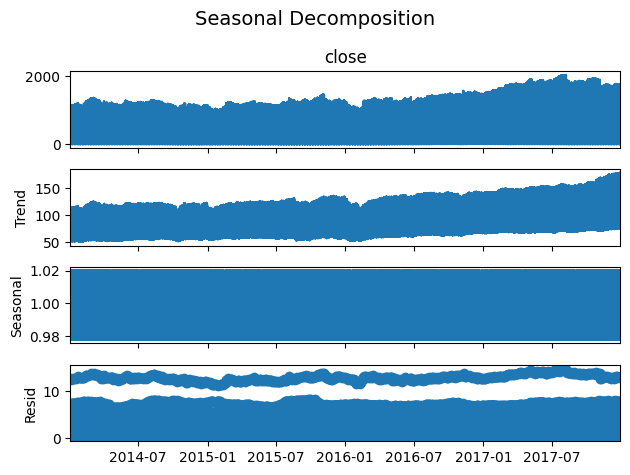

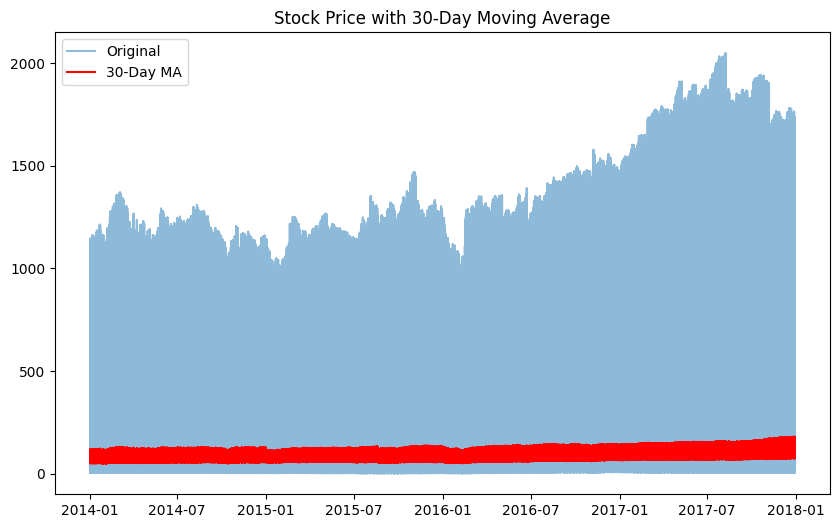

In [ ]:
# Part 2: Stock Price Time Series Analysis
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
stock_path = r"D:\\Codeveda_Intership\\drive-download-20250505T064604Z-1-001\\2) Stock Prices Data Set.csv"
stock_df = pd.read_csv(stock_path)

# Convert and set date index
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.set_index('date', inplace=True)
stock_df['close'] = pd.to_numeric(stock_df['close'], errors='coerce')

# Time series plot
plt.figure(figsize=(10, 6))
plt.plot(stock_df['close'], label='Stock Close Price')
plt.title('Stock Price Over Time')
plt.grid(False)
plt.legend()
plt.show()

# Decomposition
decomposition = seasonal_decompose(stock_df['close'].dropna(), model='multiplicative', period=30)
decomposition.plot()
plt.suptitle("Seasonal Decomposition", fontsize=14)
plt.tight_layout()
plt.show()

# Moving average
stock_df['Moving_Avg'] = stock_df['close'].rolling(window=30).mean()
plt.figure(figsize=(10, 6))
plt.plot(stock_df['close'], label='Original', alpha=0.5)
plt.plot(stock_df['Moving_Avg'], label='30-Day MA', color='red')
plt.title('Stock Price with 30-Day Moving Average')
plt.grid(False)
plt.legend()
plt.show()

# 4.K-Means Clustering

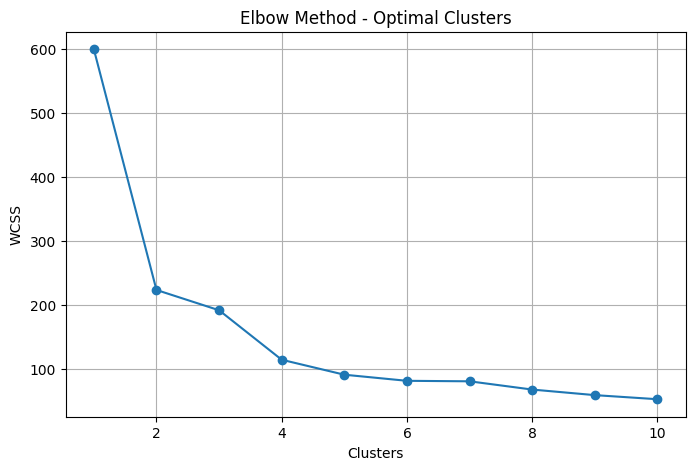

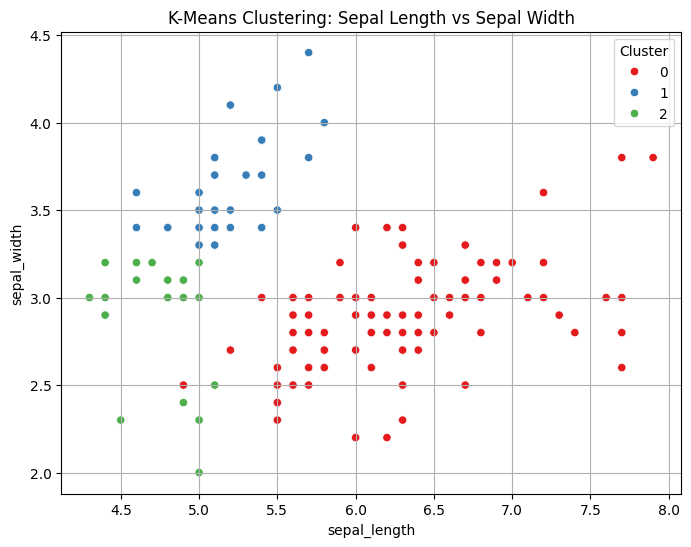

In [ ]:
# Part 3: K-Means Clustering - Iris Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
iris_path = r"D:\\Codeveda_Intership\\drive-download-20250505T064604Z-1-001\\1) iris.csv"
iris_df = pd.read_csv(iris_path)

# Standardize features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df[features])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering: Sepal Length vs Sepal Width')
plt.grid(True)
plt.show()